#1. File upload

face_cascade_name = 'haarcascade_frontalface_alt.xml'

eyes_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'

file_name = 'obama_01.jpeg, obama_02.jpeg, obama_01.jpg'


#2. load File

In [3]:
import cv2
import matplotlib.pyplot as plt 

In [28]:
# file_name = 'obama_01.jpeg' # 눈이 너무 작게 나와서 안나옴
# file_name = 'obama_02.jpeg' # 정면이 아니라서 안나옴
file_name = 'obama_03.jpg'

face_cascade_name = 'haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'

In [29]:
face_cascade = cv2.CascadeClassifier()
eyes_cascade = cv2.CascadeClassifier()

# face_casecade = cv2.CascadeClassifier() 

In [30]:
#-- 1. Load the cascades
if not face_cascade.load(cv2.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)    
if not eyes_cascade.load(cv2.samples.findFile(eyes_cascade_name)):
    print('--(!)Error loading eyes cascade')
    exit(0)    

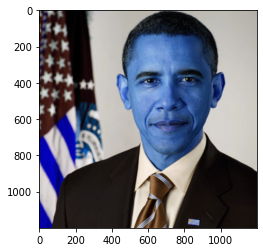

In [31]:
img = cv2.imread(file_name)
plt.imshow(img)

In [32]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)

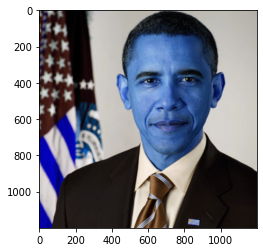

In [33]:
plt.imshow(img)

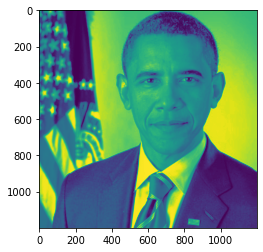

In [34]:
plt.imshow(gray)

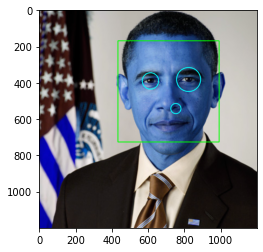

In [35]:
faces = face_cascade.detectMultiScale(gray)
for (x,y,w,h) in faces:
    center = (x + w//2, y + h//2)
    # 사각형 (대상이미지, 좌측 모서리, 우측 모소리, 색, 굵기) 
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
    
    # 순서가 반대인 것은 중요하지 않음
    # 얼굴 안에서만 찾기 위해 얼굴 위치 값을 return 받음
    faceROI = gray[y:y+h, x:x+w]
    eyes = eyes_cascade.detectMultiScale(faceROI)
    for (x2, y2, w2, h2) in eyes:
        # 전체 사진에서 구하기 때문에 실제로 x 에서 더 감
        eye_center = (x + x2 + w2//2, y + y2 + h2//2)
        radius = int(round((w2+h2)*0.25))
        img = cv2.circle(img, eye_center, radius, (0, 255, 255), 3)

plt.imshow(img)